In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

# Preprocess

In [4]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'defaults'


In [5]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid value for "node": expected "ast.AST", got "<class 'NoneType'>"; to visit lists of nodes, use "visit_block" instead


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid value for "node": expected "ast.AST", got "<class 'NoneType'>"; to visit lists of nodes, use "visit_block" instead


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid value for "node": expected "ast.AST", got "<class 'NoneType'>"; to visit lists of nodes, use "visit_block" instead


In [6]:
BUFFER_SIZE = 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 500

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)

test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

# Model

## Otline the model

In [7]:
input_size = 784
ouput_size = 10
hidden_layer_size = 420

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
                            tf.keras.layers.Dense(ouput_size, activation='softmax')
                            ])

### Choose the optimizer and the loss function

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training

In [9]:
NUM_EPOCHS = 5

model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), validation_steps=1, verbose=2)

Epoch 1/5
108/108 - 10s - loss: 0.3571 - accuracy: 0.8965 - val_loss: 0.1656 - val_accuracy: 0.9535
Epoch 2/5
108/108 - 11s - loss: 0.1203 - accuracy: 0.9647 - val_loss: 0.1042 - val_accuracy: 0.9680
Epoch 3/5
108/108 - 11s - loss: 0.0813 - accuracy: 0.9757 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 4/5
108/108 - 12s - loss: 0.0561 - accuracy: 0.9837 - val_loss: 0.0562 - val_accuracy: 0.9838
Epoch 5/5
108/108 - 13s - loss: 0.0390 - accuracy: 0.9887 - val_loss: 0.0504 - val_accuracy: 0.9853


### Testing the model

In [10]:
test_loss, test_accuracy = model.evaluate(test_data)

      1/Unknown - 1s 828ms/step - loss: 0.0763 - accuracy: 0.9760

In [11]:
print('Test Loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

Test Loss: 0.08. Test accuracy: 97.60%


## To select a picture from the dataset and predict the result

In [12]:
iterator = mnist_test.__iter__()
images=[]
for mnist_example in iterator: 
    images.append(mnist_example)

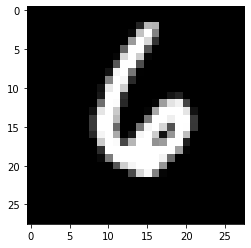

In [13]:
mnist_example = images[0] # first image
img, label = mnist_example[0], mnist_example[1]
plt.imshow(img.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))

In [14]:
img = tf.expand_dims(img, axis=0)      
img = scale(img, label)
pred = model.predict_classes(img)[0]
print('actual class:', label.numpy())
print('predicted class:', pred)

actual class: 6
predicted class: 6


actual class: 2
predicted class: 2


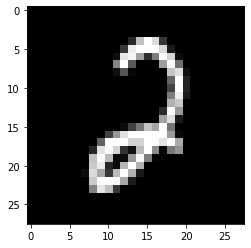

In [15]:
mnist_example = images[1] # 2nd image
img, label = mnist_example[0], mnist_example[1]
plt.imshow(img.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
img = tf.expand_dims(img, axis=0)      
img = scale(img, label)
pred = model.predict_classes(img)[0]
print('actual class:', label.numpy())
print('predicted class:', pred)

actual class: 6
predicted class: 6


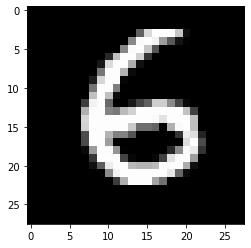

In [16]:
mnist_example = images[69]
img, label = mnist_example[0], mnist_example[1]
plt.imshow(img.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
img = tf.expand_dims(img, axis=0)      
img = scale(img, label)
pred = model.predict_classes(img)[0]
print('actual class:', label.numpy())
print('predicted class:', pred)

actual class: 7
predicted class: 7


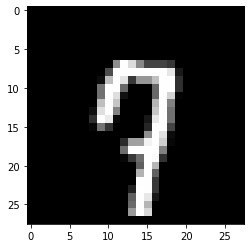

In [17]:
mnist_example = images[420]
img, label = mnist_example[0], mnist_example[1]
plt.imshow(img.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
img = tf.expand_dims(img, axis=0)      
img = scale(img, label)
pred = model.predict_classes(img)[0]
print('actual class:', label.numpy())
print('predicted class:', pred)

actual class: 6
predicted class: 6


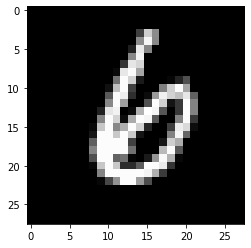

In [18]:
mnist_example = images[368] # 2nd image
img, label = mnist_example[0], mnist_example[1]
plt.imshow(img.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
img = tf.expand_dims(img, axis=0)      
img = scale(img, label)
pred = model.predict_classes(img)[0]
print('actual class:', label.numpy())
print('predicted class:', pred)

actual class: 0
predicted class: 0


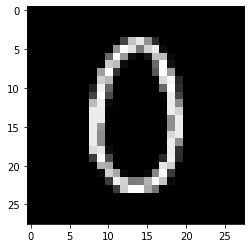

In [19]:
mnist_example = images[1959] # 2nd image
img, label = mnist_example[0], mnist_example[1]
plt.imshow(img.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
img = tf.expand_dims(img, axis=0)      
img = scale(img, label)
pred = model.predict_classes(img)[0]
print('actual class:', label.numpy())
print('predicted class:', pred)